In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Normalizer for the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Defining the CNN from the PyTorch blitz tutorial


In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [40]:
%%time
# Defining an optimizer and a criterion
import torch.optim as optim
numm = 0
for batch_size in [2, 4, 8, 16, 32]:
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)
    
    for lr in [3e-2, 1e-2, 3e-3, 1e-3]:
        for n_epochs in [1, 3, 5]:
    
            net = Net()


            criterion = nn.CrossEntropyLoss()
            optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
            # Training the network


            for epoch in range(n_epochs):  # loop over the dataset multiple times

                running_loss = 0.0
                for i, data in enumerate(trainloader, 0):
                    # get the inputs; data is a list of [inputs, labels]
                    inputs, labels = data

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward + backward + optimize
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # print statistics
                    running_loss += loss.item()
            PATH = f'./modelsCifar/{n_epochs}_{batch_size}_{lr}.pth'
            torch.save(net.state_dict(), PATH)
            print(numm, '/', 180)
            numm+=1


Files already downloaded and verified
Files already downloaded and verified
0 / 180
1 / 180
2 / 180
3 / 180
4 / 180
5 / 180
6 / 180
7 / 180
8 / 180
9 / 180
10 / 180
11 / 180
Files already downloaded and verified
Files already downloaded and verified
12 / 180
13 / 180
14 / 180
15 / 180
16 / 180
17 / 180
18 / 180
19 / 180
20 / 180
21 / 180
22 / 180
23 / 180
Files already downloaded and verified
Files already downloaded and verified
24 / 180
25 / 180
26 / 180
27 / 180
28 / 180
29 / 180
30 / 180
31 / 180
32 / 180
33 / 180
34 / 180
35 / 180
Files already downloaded and verified
Files already downloaded and verified
36 / 180
37 / 180
38 / 180
39 / 180
40 / 180
41 / 180
42 / 180
43 / 180
44 / 180
45 / 180
46 / 180
47 / 180
Files already downloaded and verified
Files already downloaded and verified
48 / 180
49 / 180
50 / 180
51 / 180
52 / 180
53 / 180
54 / 180
55 / 180
56 / 180
57 / 180
58 / 180
59 / 180
CPU times: user 1h 18min 7s, sys: 5min 33s, total: 1h 23min 41s
Wall time: 2h 6min 49s


In [34]:
batch_size = 1
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [51]:
# for data in testloader:
#     a, b = data
#     print(a)
#     break




ValueError: not enough values to unpack (expected 2, got 1)

In [74]:
import os

model_dict = dict()

for modelname in os.listdir('modelsCifar/'):
    model_dict[modelname] = dict()
    
    net = Net()
    net.load_state_dict(torch.load('modelsCifar/' + modelname))
    predictions = []
    true_y = []
    for x, y in testloader:
        outputs = net(x)
        _, predicted = torch.max(outputs.data, 1)
        predictions.append(predicted[0])
        true_y.append(y[0])
    model_dict[modelname]['classification_report'] = cr(true_y, predictions)
    model_dict[modelname]['accuracy'] = sum(np.array(predictions) == np.array(true_y)) / len(true_y)

/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [84]:
maxname = None
maxacc = -1
for name, dictionary in model_dict.items():
    if dictionary['accuracy'] >= maxacc:
        maxname = name
        maxacc = dictionary['accuracy']

In [89]:
print(model_dict[maxname]['classification_report'])

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1000
           1       0.81      0.72      0.76      1000
           2       0.47      0.56      0.51      1000
           3       0.45      0.33      0.38      1000
           4       0.59      0.48      0.53      1000
           5       0.55      0.51      0.52      1000
           6       0.58      0.78      0.67      1000
           7       0.66      0.71      0.68      1000
           8       0.72      0.67      0.69      1000
           9       0.73      0.70      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.62      0.61     10000



In [93]:
import json

with open('model_reports.json', 'w') as outfile:
    json.dump(outfile, model_dict)
    

TypeError: Object of type TextIOWrapper is not JSON serializable

In [28]:
dataiter = iter(testloader)
images, labels = next(dataiter)

predictions = net(images)
_, predictions = torch.max(predictions, 1)
from sklearn.metrics import classification_report as cr

cr(labels, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           3       1.00      1.00      1.00         1\n           8       1.00      1.00      1.00         2\n\n    accuracy                           1.00         4\n   macro avg       1.00      1.00      1.00         4\nweighted avg       1.00      1.00      1.00         4\n'

In [29]:
print(cr(labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [27]:
predictions.detach().numpy()

array([[-1.3066325 , -2.0968306 ,  1.1972334 ,  3.4729705 , -0.03324035,
         2.2360697 ,  0.7285853 , -0.17381896, -1.4927337 , -1.3956404 ],
       [ 5.581526  ,  5.129679  , -1.3387331 , -3.3507948 , -2.3286283 ,
        -4.875051  , -4.322751  , -4.5319457 ,  7.3156857 ,  2.6852984 ],
       [ 2.552159  ,  1.1835583 , -0.07537331, -1.3260505 , -0.52934885,
        -2.0462277 , -2.3439767 , -1.2662203 ,  2.9130967 ,  0.8336896 ],
       [ 4.959168  ,  1.3635172 ,  0.02037015, -2.5597782 , -0.20198205,
        -3.7728205 , -2.4453535 , -2.9406304 ,  4.5483336 ,  0.54925   ]],
      dtype=float32)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
# imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

NameError: name 'trainloader' is not defined

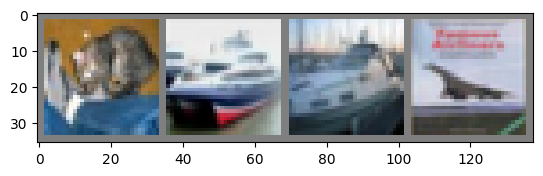

GroundTruth:  cat   ship  ship  plane


In [24]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [25]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [26]:


print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   truck plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [30]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 49 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [28]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 42.6 %
Accuracy for class: car   is 48.8 %
Accuracy for class: bird  is 23.5 %
Accuracy for class: cat   is 24.4 %
Accuracy for class: deer  is 25.9 %
Accuracy for class: dog   is 36.4 %
Accuracy for class: frog  is 54.1 %
Accuracy for class: horse is 50.1 %
Accuracy for class: ship  is 54.4 %
Accuracy for class: truck is 47.9 %


In [33]:
for data in testloader:
    a, b = data
    print(a)
    break

tensor([[[[ 0.2392,  0.2471,  0.2941,  ...,  0.0745, -0.0118, -0.0902],
          [ 0.1922,  0.1843,  0.2471,  ...,  0.0667, -0.0196, -0.0667],
          [ 0.1843,  0.1843,  0.2392,  ...,  0.0902,  0.0196, -0.0588],
          ...,
          [-0.4667, -0.6706, -0.7569,  ..., -0.7020, -0.8980, -0.6863],
          [-0.5216, -0.6157, -0.7255,  ..., -0.7961, -0.7725, -0.8431],
          [-0.5765, -0.5608, -0.6471,  ..., -0.8118, -0.7333, -0.8353]],

         [[-0.1216, -0.1294, -0.0902,  ..., -0.2549, -0.2863, -0.3333],
          [-0.1216, -0.1373, -0.1059,  ..., -0.2549, -0.2863, -0.3098],
          [-0.1373, -0.1451, -0.1294,  ..., -0.2314, -0.2549, -0.3020],
          ...,
          [-0.0275, -0.2157, -0.3098,  ..., -0.2392, -0.4980, -0.3333],
          [-0.0902, -0.2000, -0.3333,  ..., -0.3569, -0.3569, -0.4980],
          [-0.1608, -0.1765, -0.3020,  ..., -0.3961, -0.3412, -0.4745]],

         [[-0.6157, -0.6314, -0.6000,  ..., -0.7176, -0.7176, -0.7412],
          [-0.6000, -0.6863, -

Okay, so what next?

How do we run these neural networks on the GPU?

## Training on GPU
Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:



In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = data[0].to(device), data[1].to(device)

Why don't I notice MASSIVE speedup compared to CPU? Because your network
is really small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

## Training on multiple GPUs
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

## Where do I go next?

-  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
-  `Train a state-of-the-art ResNet network on imagenet`_
-  `Train a face generator using Generative Adversarial Networks`_
-  `Train a word-level language model using Recurrent LSTM networks`_
-  `More examples`_
-  `More tutorials`_
-  `Discuss PyTorch on the Forums`_
-  `Chat with other users on Slack`_




In [ ]:
del dataiter